In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import pandas as pd

In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

def extract_vgg_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = base_model.predict(img_array)
    return features.flatten()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Path to dataset
main_path = '/content/drive/My Drive/projects_data/fyp/Categorized_images'
dir_list = os.listdir(main_path)
print(dir_list)

['Bad', 'Neutral', 'Good', 'Very Bad', 'Very Good']


In [ ]:
labels = {'Very Bad': 4, 'Bad': 3, 'Neutral': 2, 'Good': 1, 'Very Good': 0}
image_list = {'Very Bad': [], 'Bad': [], 'Neutral': [], 'Good': [], 'Very Good': []}

In [ ]:
for dir_name in dir_list:
    files_in_dir = os.listdir(f"{main_path}/{dir_name}")
    image_list[dir_name].extend(files_in_dir)

for list_ in image_list:
    print(list_, len(image_list[list_]))

Very Bad 600
Bad 600
Neutral 600
Good 600
Very Good 600


In [ ]:
y = []
X_images = []
filenames = []

In [ ]:
for key in image_list:
    print(key)
    print(image_list[key])
    for img in image_list[key]:
        img_path = f"{main_path}/{key}/{img}"
        try:
            img_array = extract_vgg_features(img_path)
            X_images.append(img_array)
            y.append(labels[key])
            filenames.append(img_path)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

Very Bad
['265.jpg', '264.jpg', '266.jpg', '268.jpg', '267.jpg', '269.jpg', '254.jpg', '272.jpg', '270.jpg', '255.jpg', '274.jpg', '273.jpg', '279.jpg', '275.jpg', '276.jpg', '278.jpg', '277.jpg', '287.jpg', '286.jpg', '256.jpg', '284.jpg', '280.jpg', '285.jpg', '257.jpg', '283.jpg', '282.jpg', '281.jpg', '290.jpg', '289.jpg', '288.jpg', '292.jpg', '296.jpg', '293.jpg', '294.jpg', '252.jpg', '291.jpg', '295.jpg', '297.jpg', '300.jpg', '298.jpg', '299.jpg', '301.jpg', '253.jpg', '302.jpg', '258.jpg', '303.jpg', '259.jpg', '261.jpg', '304.jpg', '305.jpg', '260.jpg', '262.jpg', '263.jpg', '251.jpg', '314.jpg', '315.jpg', '136.jpg', '319.jpg', '317.jpg', '318.jpg', '306.jpg', '321.jpg', '322.jpg', '320.jpg', '316.jpg', '326.jpg', '324.jpg', '329.jpg', '323.jpg', '328.jpg', '325.jpg', '327.jpg', '343.jpg', '400.jpg', '338.jpg', '332.jpg', '336.jpg', '334.jpg', '335.jpg', '340.jpg', '339.jpg', '333.jpg', '337.jpg', '342.jpg', '341.jpg', '331.jpg', '330.jpg', '308.jpg', '345.jpg', '344.jpg', 

In [ ]:
X_images = np.array(X_images)
y = np.array(y)
filenames = np.array(filenames)

In [ ]:
 #Split data into training and testing sets
X_train, X_test, y_train, y_test, filenames_train, filenames_test = train_test_split(
    X_images, y, filenames, test_size=0.2, random_state=42)

In [ ]:
# Save train and test sets
train_path = '/content/drive/My Drive/projects_data/fyp/train_set_VGG'
test_path = '/content/drive/My Drive/projects_data/fyp/test_set_VGG'
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

np.save(os.path.join(train_path, 'X_train.npy'), X_train)
np.save(os.path.join(train_path, 'y_train.npy'), y_train)
np.save(os.path.join(test_path, 'X_test.npy'), X_test)
np.save(os.path.join(test_path, 'y_test.npy'), y_test)
np.save(os.path.join(test_path, 'filenames_test.npy'), filenames_test)

In [ ]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.67


In [ ]:
# Save the model
with open('/content/drive/My Drive/projects_data/fyp/VGG_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=labels.keys(), columns=labels.keys())

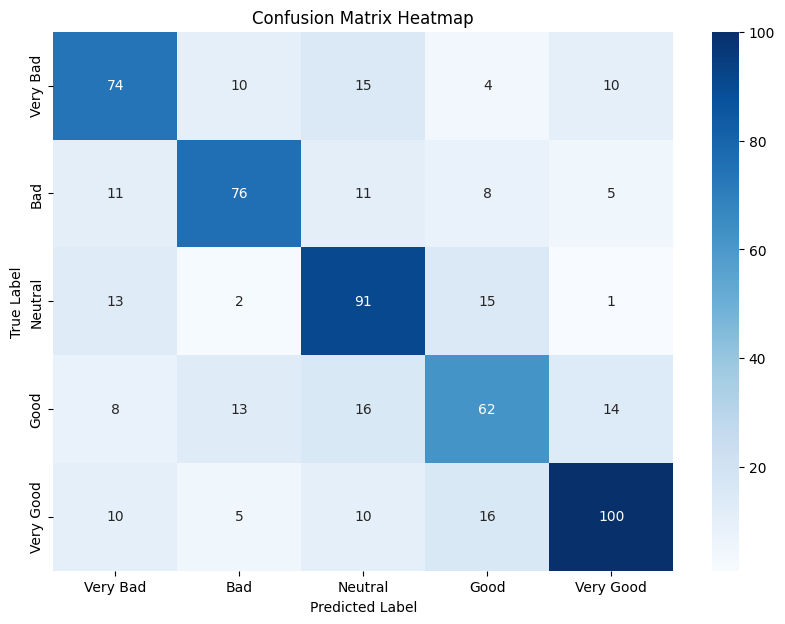

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()